# Proyecto 2. Entrega 3:  Naive Bayes
Integrantes: 
- Francis Aguilar #22243
- Angela Garcia #22869  

Enlace de repositorio: https://github.com/angelargd8/Proyecto2.3-MDD

In [67]:
#cargar los datos
import pandas as pd 
df_train = pd.read_csv("train.csv")
df_numerico = df_train.select_dtypes(include=['number'])
df_numerico.dropna(inplace=True)

# 1. Elabore un modelo de regresión usando bayes ingenuo (naive bayes), el conjunto de entrenamiento y la variable respuesta SalesPrice. Prediga con el modelo y explique los resultados a los que llega. Asegúrese que los conjuntos de entrenamiento y prueba sean los mismos de las hojas anteriores para que los modelos sean comparables. 

In [68]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error


df_numerico = df_train.select_dtypes(include=['number'])
df_numerico.dropna(inplace=True)

variables_numericas = df_numerico.select_dtypes(include=[np.number]).columns.tolist()

# Separar las variables independientes (X) y la variable dependiente (y)
X = df_numerico[variables_numericas].drop(columns=['SalePrice'])
y = df_numerico['SalePrice']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#modelo
modelo = GaussianNB()

# entrenar el modelo
modelo.fit(X_train, y_train)

# hacer predicciones
y_pred = modelo.predict(X_test)

y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

# Analizar el modelo
print("Error cuadrático medio (MSE) en entrenamiento:", mean_squared_error(y_train, y_pred_train))
print("Error cuadrático medio (MSE) en prueba:", mean_squared_error(y_test, y_pred_test))
print("R^2 en entrenamiento:", r2_score(y_train, y_pred_train))
print("R^2 en prueba:", r2_score(y_test, y_pred_test))




Error cuadrático medio (MSE) en entrenamiento: 235849765.625
Error cuadrático medio (MSE) en prueba: 3331389013.648889
R^2 en entrenamiento: 0.9643033447843158
R^2 en prueba: 0.5776273054255472


Lo que nos indica el MSE, es que el conjunto de prueba es mayor que el el conjunto de entrenamiento, indicando que el modelo puede estar sobreajustado.

Por otro lado, el R^2 en entrenamiento es bastante anto, indicando que el modelo explica bien la variabilidad de los datos de entrenamiento. Aunque el de prueba es más bajo, entonces el modelo no generaliza bien a los datos de prueba, sugiriendo que el modelo puede estar sobreajustado.


Por lo tanto, lo que se debe de hacer es aplicar tecnicas para reduccir el sobreajuste.

In [69]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Seleccionar las mejores características
selector = SelectKBest(score_func=f_regression, k=10)
X_new = selector.fit_transform(X, y)

# Dividir los datos con las nuevas características seleccionadas
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.2, random_state=42)

# modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train_new, y_train_new)

# predicciones en el conjunto de entrenamiento y prueba
y_pred_train_rf = rf_model.predict(X_train_new)
y_pred_test_rf = rf_model.predict(X_test_new)

# entrenamiento
mse_train_rf = mean_squared_error(y_train_new, y_pred_train_rf)
r2_train_rf = r2_score(y_train_new, y_pred_train_rf)
print("Error cuadrático medio (MSE) en entrenamiento:", mse_train_rf)
print("R^2 en entrenamiento:", r2_train_rf)

# prueba
mse_test_rf = mean_squared_error(y_test_new, y_pred_test_rf)
r2_test_rf = r2_score(y_test_new, y_pred_test_rf)
print("Error cuadrático medio (MSE) en prueba:", mse_test_rf)
print("R^2 en prueba :", r2_test_rf)

Error cuadrático medio (MSE) en entrenamiento: 222737467.3314694
R^2 en entrenamiento: 0.9662879352291229
Error cuadrático medio (MSE) en prueba: 912958269.5049657
R^2 en prueba : 0.8842498901374227


# 2. Analice los resultados del modelo de regresión usando bayes ingenuo. ¿Qué tan bien le fue prediciendo? Utilice las métricas correctas. 

Al usar random forest. Lo que se observa en los resultados es que el MSE en el conjunto de prueba es bajo, lo que indica que el modelo esta haciendo buenas predicciones en datos nuevos. Mientras que R^2 es alto, entonces indica que el modelo explica bien la variabilidad de datos.

# 3. Compare los resultados con el modelo de regresión lineal y el árbol de regresión que hizo en las entregas pasadas. ¿Cuál funcionó mejor?

Al comparar el MSE, Random Forest tiene los resultados más bajo del modelo de prueba, entonces sus predicciones estan más cerca de los valores reales. Y acerca del R^2, el de random forest tiene el valor más alto en el conjunto de prueva, entonces indica una mejor explicacion de variabilidad de los datos de prueba. Entonces, el modelo de Random Forest con sobreajuste parece ser un mejor modelo.

# 4. Haga un modelo de clasificación, use la variable categórica que hizo con el precio de las casas (barata, media y cara) como variable respuesta. 

In [70]:
#calcular percentiles 33 y 66 %%
import seaborn as sns

df_train = pd.read_csv("train.csv")
df_numerico = df_train.select_dtypes(include=['number'])
df_numerico.dropna(inplace=True)

low = df_train['SalePrice'].quantile(0.33)

medium = df_train['SalePrice'].quantile(0.66)

high = df_train['SalePrice'].max()

df_train['SalePrice_Class'] = pd.cut(df_train['SalePrice'], bins=[0, low, medium, high], labels=['Economic', 'Intermediate', 'High'])

print(df_train['SalePrice_Class'].value_counts())


SalePrice_Class
High            497
Economic        483
Intermediate    480
Name: count, dtype: int64


In [71]:

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report


df_numerico = df_train.select_dtypes(include=['number'])
df_numerico.dropna(inplace=True)
df_train = df_train.loc[df_numerico.index]

variables_numericas = df_numerico.select_dtypes(include=[np.number]).columns.tolist()

print("Variables numéricas:", variables_numericas)

X = df_numerico[variables_numericas].drop(columns=['SalePrice'], errors='ignore')
y = df_train['SalePrice_Class']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#modelo
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, y_train)


Variables numéricas: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Shape of X: (1121, 37)
Shape of y: (1121,)


GaussianNB()

# 5. Utilice los modelos con el conjunto de prueba y determine la eficiencia del algoritmo para predecir y clasificar.

In [72]:
from sklearn.metrics import accuracy_score, classification_report

# predicciones
y_pred_train_gnb = gnb_classifier.predict(X_train)
y_pred_test_gnb = gnb_classifier.predict(X_test)

# evaluar
accuracy_train_gnb = accuracy_score(y_train, y_pred_train_gnb)
accuracy_test_gnb = accuracy_score(y_test, y_pred_test_gnb)

print("Accuracy en entrenamiento:", accuracy_train_gnb)
print("Accuracy en prueba:", accuracy_test_gnb)
print("Reporte de clasificacion en prueba:")
print(classification_report(y_test, y_pred_test_gnb))

Accuracy en entrenamiento: 0.7209821428571429
Accuracy en prueba: 0.6533333333333333
Reporte de clasificacion en prueba:
              precision    recall  f1-score   support

    Economic       0.57      0.95      0.71        56
        High       0.89      0.66      0.76        89
Intermediate       0.53      0.44      0.48        80

    accuracy                           0.65       225
   macro avg       0.66      0.68      0.65       225
weighted avg       0.68      0.65      0.65       225



# 6. Haga un análisis de la eficiencia del modelo de clasificación usando una matriz de confusión. Tenga en cuenta la efectividad, donde el algoritmo se equivocó más, donde se equivocó menos y la importancia que tienen los errores

[[53  3  0]
 [38 35  7]
 [ 2 28 59]]


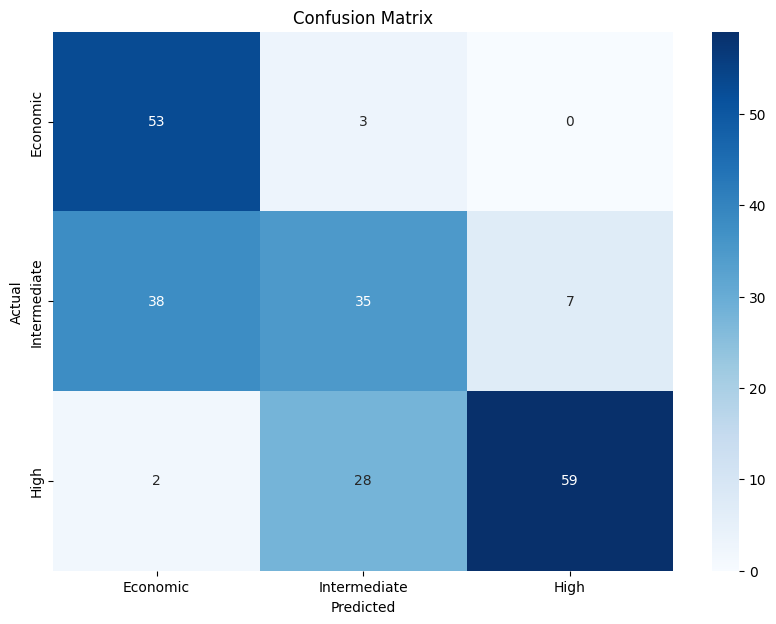

Accuracy: 0.6533333333333333
              precision    recall  f1-score   support

    Economic       0.57      0.95      0.71        56
        High       0.89      0.66      0.76        89
Intermediate       0.53      0.44      0.48        80

    accuracy                           0.65       225
   macro avg       0.66      0.68      0.65       225
weighted avg       0.68      0.65      0.65       225



In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# print("y_test:", y_test)
# print("y_pred_test_gnb:", y_pred_test_gnb)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_test_gnb, labels=['Economic', 'Intermediate', 'High'])
print(cm)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Economic', 'Intermediate', 'High'], yticklabels=['Economic', 'Intermediate', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred_test_gnb)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred_test_gnb))

Lo que se puede observar del modelo, es que en las economicas, predijo correctamente 53 resultados, pero hubo 3 casos que los predijo incorrectaente como intermedio. 
Mientras que, en intermedio tuvo más dificultades, ya que solo predijo correctamente 34, donde 38 las predijo como economicas y 7 como high. 
Ya en el precio elevado, predijo correctamente 59, con 2 casos como economic y 28 como intermedio. 

Por lo que se puede decir que el modelo tiene mayor problemas con la clase de intermedio y tiene una mejor presición en las economicas y el precio elevado.

La importancia que tienen los errores es que, en "intermediate" pueden llegar a ser significativos, entonces se debe de mejorar la representación de esta clase o ajustar los parametros. 
